In [ ]:
import random
import numpy as np

# Define the function to be optimized
def target_function(x):
    return x**2 + 2*x + 1

# Define the fitness function
def fitness(individual):
    # Convert the individual's binary representation to a decimal value
    x = int(''.join(map(str, individual)), 2)
    # Evaluate the target function using the decimal value
    result = target_function(x)
    # Return the fitness score (lower is better)
    return -result

# Define the genetic algorithm parameters
POPULATION_SIZE = 100
GENOME_LENGTH = 10
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
GENERATIONS = 50

# Initialize the population randomly
population = np.random.randint(2, size=(POPULATION_SIZE, GENOME_LENGTH))

# Run the evolutionary algorithm
for generation in range(GENERATIONS):
    # Evaluate the fitness of each individual
    fitness_scores = np.array([fitness(individual) for individual in population])

    # Select parents for reproduction
    parent_indices = np.random.choice(POPULATION_SIZE, size=POPULATION_SIZE, replace=True,
                                      p=(-fitness_scores) / (-fitness_scores).sum())
    parents = population[parent_indices]

    # Create offspring through crossover
    offspring = np.empty_like(parents)
    for i in range(0, POPULATION_SIZE, 2):
        if random.random() < CROSSOVER_RATE:
            crossover_point = random.randint(1, GENOME_LENGTH - 1)
            offspring[i, :crossover_point] = parents[i, :crossover_point]
            offspring[i, crossover_point:] = parents[i + 1, crossover_point:]
            offspring[i + 1, :crossover_point] = parents[i + 1, :crossover_point]
            offspring[i + 1, crossover_point:] = parents[i, crossover_point:]
        else:
            offspring[i] = parents[i]
            offspring[i + 1] = parents[i + 1]

    # Perform mutation
    mutation_mask = np.random.rand(*offspring.shape) < MUTATION_RATE
    offspring[mutation_mask] = 1 - offspring[mutation_mask]

    # Replace the population with the offspring
    population = offspring

    # Print the best individual in each generation
    best_individual = population[np.argmax(fitness_scores)]
    best_fitness = -fitness(best_individual)
    print(f"Generation {generation+1}: Best Individual = {best_individual}, Best Fitness = {best_fitness}")

# Print the final best solution
best_individual = population[np.argmax(fitness_scores)]
best_fitness = -fitness(best_individual)
print(f"\nFinal Best Solution: {best_individual}")
print(f"Final Best Fitness: {best_fitness}")

Generation 1: Best Individual = [1 1 1 0 0 0 1 0 1 0], Best Fitness = 822649
Generation 2: Best Individual = [1 1 1 1 0 0 0 1 1 1], Best Fitness = 937024
Generation 3: Best Individual = [0 1 1 1 1 1 0 1 0 1], Best Fitness = 252004
Generation 4: Best Individual = [1 1 0 1 1 0 0 1 0 1], Best Fitness = 756900
Generation 5: Best Individual = [1 1 1 1 1 1 0 0 1 1], Best Fitness = 1024144
Generation 6: Best Individual = [1 1 0 1 1 1 0 1 0 1], Best Fitness = 784996
Generation 7: Best Individual = [1 1 1 0 0 1 0 0 1 0], Best Fitness = 837225
Generation 8: Best Individual = [1 0 0 0 0 0 1 0 1 0], Best Fitness = 273529
Generation 9: Best Individual = [1 1 1 1 1 0 1 0 0 0], Best Fitness = 1002001
Generation 10: Best Individual = [1 1 1 0 0 1 1 1 0 0], Best Fitness = 855625
Generation 11: Best Individual = [1 1 0 1 1 0 1 1 1 0], Best Fitness = 772641
Generation 12: Best Individual = [1 1 0 0 0 0 1 1 0 0], Best Fitness = 609961
Generation 13: Best Individual = [1 1 1 1 1 0 1 0 0 1], Best Fitness = 

Best Inventory Levels: [94 99 59 22 98 97 57 10 94 23]
Best Total Cost: 201085.18803086196


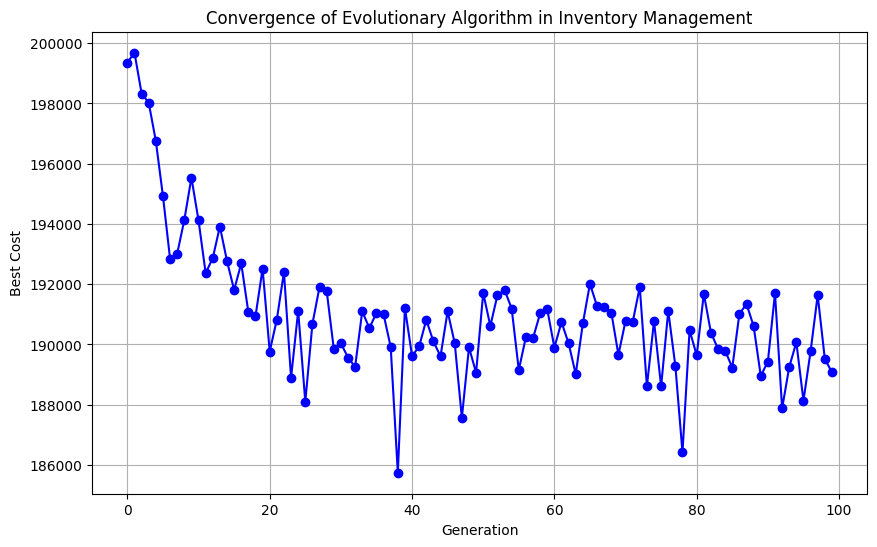

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class InventoryManagement:
    def __init__(self, num_products, num_periods, holding_cost, shortage_cost, demand_pattern, lead_times):
        self.num_products = num_products
        self.num_periods = num_periods
        self.holding_cost = holding_cost
        self.shortage_cost = shortage_cost
        self.demand_pattern = demand_pattern
        self.lead_times = lead_times

    def simulate(self, inventory_levels):
        total_cost = 0
        on_order = np.zeros((self.num_products, max(self.lead_times)), dtype=int)
        inventory_levels = inventory_levels.astype(float)

        for period in range(self.num_periods):
            demand = np.random.normal(self.demand_pattern[period % 12], self.demand_pattern[period % 12] * 0.1)
            inventory_levels += on_order[:, 0]
            on_order = np.roll(on_order, -1, axis=1)

            for product in range(self.num_products):
                if inventory_levels[product] >= demand[product]:
                    total_cost += self.holding_cost[product] * inventory_levels[product]
                    inventory_levels[product] -= demand[product]
                else:
                    shortage = demand[product] - inventory_levels[product]
                    total_cost += self.shortage_cost[product] * shortage
                    inventory_levels[product] = 0

            for product in range(self.num_products):
                if period + self.lead_times[product] < self.num_periods:
                    on_order[product, self.lead_times[product] - 1] += int(inventory_levels[product] * 0.5)

        return total_cost

def evolutionary_algorithm(problem, population_size, num_generations, mutation_rate):
    population = np.random.randint(0, 100, size=(population_size, problem.num_products))
    best_costs = []

    for generation in range(num_generations):
        fitness_scores = np.array([problem.simulate(individual) for individual in population])
        best_costs.append(np.min(fitness_scores))

        parents = []
        for _ in range(population_size):
            tournament_indices = np.random.choice(population_size, size=2, replace=False)
            if fitness_scores[tournament_indices[0]] < fitness_scores[tournament_indices[1]]:
                winner_index = tournament_indices[0]
            else:
                winner_index = tournament_indices[1]
            parents.append(population[winner_index])

        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = parents[i], parents[i+1]
            crossover_point = np.random.randint(1, problem.num_products)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.append(child1)
            offspring.append(child2)

        offspring = np.array(offspring)
        mutation_mask = np.random.rand(population_size, problem.num_products) < mutation_rate
        mutation_values = np.random.randint(0, 100, size=(population_size, problem.num_products))
        offspring[mutation_mask] = mutation_values[mutation_mask]

        population = offspring

    best_individual = population[np.argmin(fitness_scores)]
    best_cost = problem.simulate(best_individual)
    return best_individual, best_cost, best_costs


num_products = 10
num_periods = 24  # Monthly data for two years
holding_cost = np.random.randint(1, 5, size=num_products)
shortage_cost = np.random.randint(10, 20, size=num_products)
demand_pattern = np.random.randint(20, 100, size=(12, num_products))
lead_times = np.random.randint(1, 4, size=num_products)

problem = InventoryManagement(num_products, num_periods, holding_cost, shortage_cost, demand_pattern, lead_times)

population_size = 100
num_generations = 100
mutation_rate = 0.1

best_inventory_levels, best_cost, best_costs = evolutionary_algorithm(problem, population_size, num_generations, mutation_rate)

print("Best Inventory Levels:", best_inventory_levels)
print("Best Total Cost:", best_cost)

plt.figure(figsize=(10, 6))
plt.plot(best_costs, marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Best Cost")
plt.title("Convergence of Evolutionary Algorithm in Inventory Management")
plt.grid(True)
plt.show()


Best Price Levels: [7 6 6 6 6]
Best Total Profit: 94800


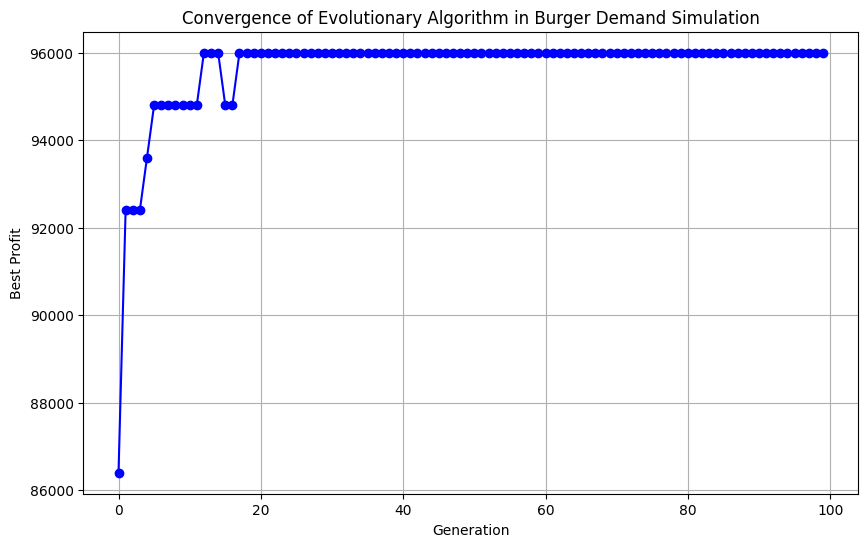

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BurgerDemandSimulation:
    def __init__(self, num_price_points, num_periods, cost_per_burger, demand_slope, demand_intercept):
        self.num_price_points = num_price_points
        self.num_periods = num_periods
        self.cost_per_burger = cost_per_burger
        self.demand_slope = demand_slope
        self.demand_intercept = demand_intercept

    def simulate(self, price_levels):
        total_profit = 0

        for period in range(self.num_periods):
            for price_point in range(self.num_price_points):
                price = price_levels[price_point]
                demand = self.demand_intercept - self.demand_slope * price
                revenue = price * demand
                cost = self.cost_per_burger * demand
                profit = revenue - cost
                total_profit += profit

        return -total_profit  # Negative profit for minimization

def evolutionary_algorithm(problem, population_size, num_generations, mutation_rate):
    population = np.random.randint(1, 10, size=(population_size, problem.num_price_points))
    best_profits = []

    for generation in range(num_generations):
        fitness_scores = np.array([problem.simulate(individual) for individual in population])
        best_profits.append(-np.min(fitness_scores))

        parents = []
        for _ in range(population_size):
            tournament_indices = np.random.choice(population_size, size=2, replace=False)
            if fitness_scores[tournament_indices[0]] < fitness_scores[tournament_indices[1]]:
                winner_index = tournament_indices[0]
            else:
                winner_index = tournament_indices[1]
            parents.append(population[winner_index])

        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = parents[i], parents[i+1]
            crossover_point = np.random.randint(1, problem.num_price_points)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.append(child1)
            offspring.append(child2)

        offspring = np.array(offspring)
        mutation_mask = np.random.rand(population_size, problem.num_price_points) < mutation_rate
        mutation_values = np.random.randint(1, 10, size=(population_size, problem.num_price_points))
        offspring[mutation_mask] = mutation_values[mutation_mask]

        population = offspring

    best_individual = population[np.argmin(fitness_scores)]
    best_profit = -problem.simulate(best_individual)
    return best_individual, best_profit, best_profits


# Example usage
num_price_points = 5
num_periods = 12  # Monthly data for one year
cost_per_burger = 2
demand_slope = 100
demand_intercept = 1000

problem = BurgerDemandSimulation(num_price_points, num_periods, cost_per_burger, demand_slope, demand_intercept)

population_size = 100
num_generations = 100
mutation_rate = 0.1

best_price_levels, best_profit, best_profits = evolutionary_algorithm(problem, population_size, num_generations, mutation_rate)

print("Best Price Levels:", best_price_levels)
print("Best Total Profit:", best_profit)

plt.figure(figsize=(10, 6))
plt.plot(best_profits, marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Best Profit")
plt.title("Convergence of Evolutionary Algorithm in Burger Demand Simulation")
plt.grid(True)
plt.show()